# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
import seaborn as sns
%matplotlib inline

<div class="theme"> Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1  [25 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes. The time of the day on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [3]:
data = pd.read_csv("data/dataset_1.csv")
data.head()

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


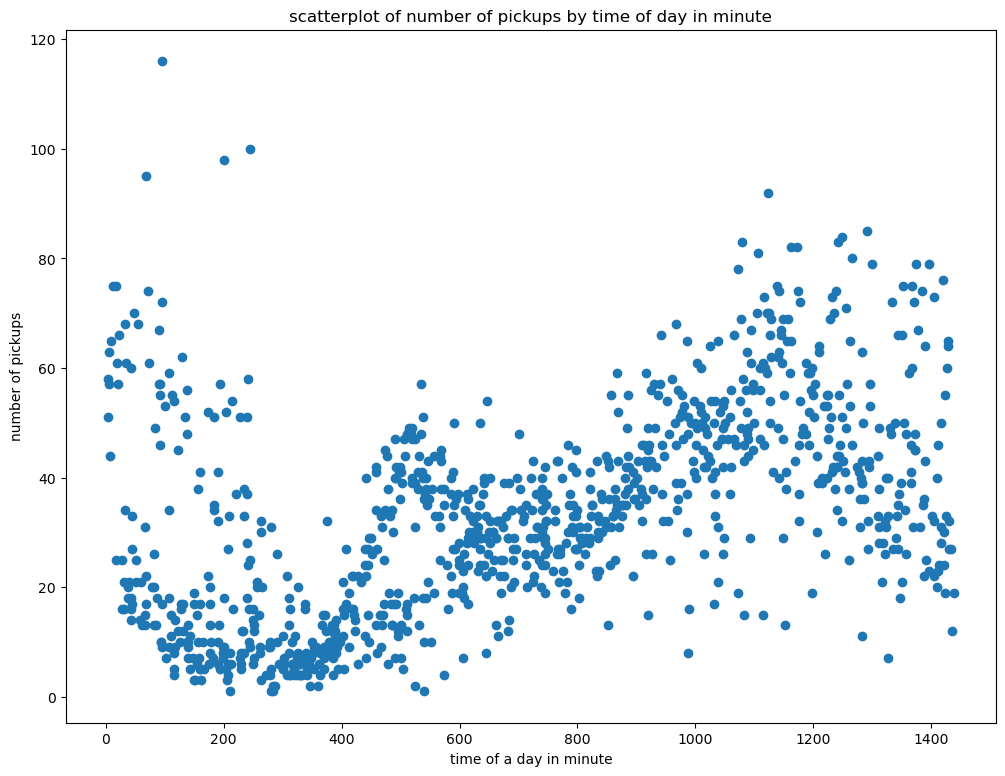

In [4]:
train_data,test_data = train_test_split(data, test_size=0.2, random_state=42)
plt.figure(figsize = (12,9))
plt.scatter(train_data.TimeMin, train_data.PickupCount)
plt.xlabel("time of a day in minute")
plt.ylabel("number of pickups")
plt.title("scatterplot of number of pickups by time of day in minute")
plt.show()

In [222]:
# read the file
# your code here
data = pd.read_csv("data/dataset_1.csv")

In [223]:
# split the data
# your code here
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [224]:
# Test size is indeed 20% of total
# your code here 
print("Shape of full dataset is: {}".format(df.shape))
print("Shape of training dataset is: {}".format(train_data.shape))
print("Shape of test dataset is: {}".format(test_data.shape))
print("Test size / total size: {}".format(test_data.shape[0]/data.shape[0]))

Shape of full dataset is: (1250, 2)
Shape of training dataset is: (1000, 2)
Shape of test dataset is: (250, 2)
Test size / total size: 0.2


**1.2 Generate a scatter plot of the training data points**

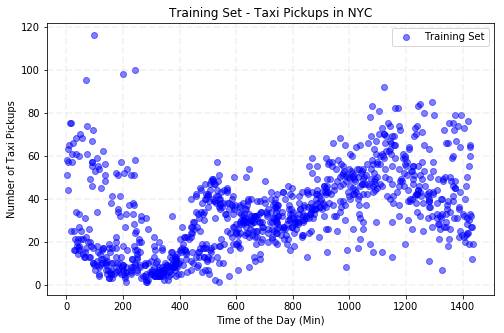

In [225]:
# Your code here
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.grid(True, lw=1.75, ls='--', alpha=0.15)
# 
ax.scatter(train_data['TimeMin'], train_data['PickupCount'], c='b', alpha=0.5, label='Training Set')
ax.set_title(r'Training Set - Taxi Pickups in NYC')
ax.set_xlabel(r'Time of the Day (Min)')
ax.set_ylabel(r'Number of Taxi Pickups')
ax.legend(loc='upper right')

**1.3 Discuss your results. Does the pattern of taxi pickups make intuitive sense to you?**

The pattern of pickups seems to bear out the social patterns you'd expect in a major urban metropolis like New York.  We see instances of very high pickup counts between midnight and 5 a.m. when people take cabs home as bars close (in a city that never sleeps as opposed to a quiet academic town like Boston).  Then you see a linear trend of pickups starting at a low point in the early morning (just after 5 a.m.) during the beginning of the morning commute when you'd expect very little social going on and steadily increasing to the common social hours in the evening at night when you'd expect people to congregate for dinner, shows, concerts, etc. There does appear to be a mid-morning surge around 8am to 10:30am, perhaps as some people travel to work via taxi.  


<div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe7e43bccc0>
Traceback (most recent call last):
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'None

when k = 1, r square score for train dataset is 0.7154229692823518 for test dataset is -0.14268188571705842
when k = 10, r square score for train dataset is 0.510202224161537 for test dataset is 0.27355693253080027
when k = 75, r square score for train dataset is 0.4458425247764254 for test dataset is 0.3907526717480967
when k = 250, r square score for train dataset is 0.35524285672098443 for test dataset is 0.34026267828103685
when k = 500, r square score for train dataset is 0.29031791813302177 for test dataset is 0.27046651624354623
when k = 750, r square score for train dataset is 0.1794235918792424 for test dataset is 0.16494544482618267


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe7e52927a0>
Traceback (most recent call last):
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'None

when k = 1000, r square score for train dataset is 0.0 for test dataset is -0.0003843303764170525


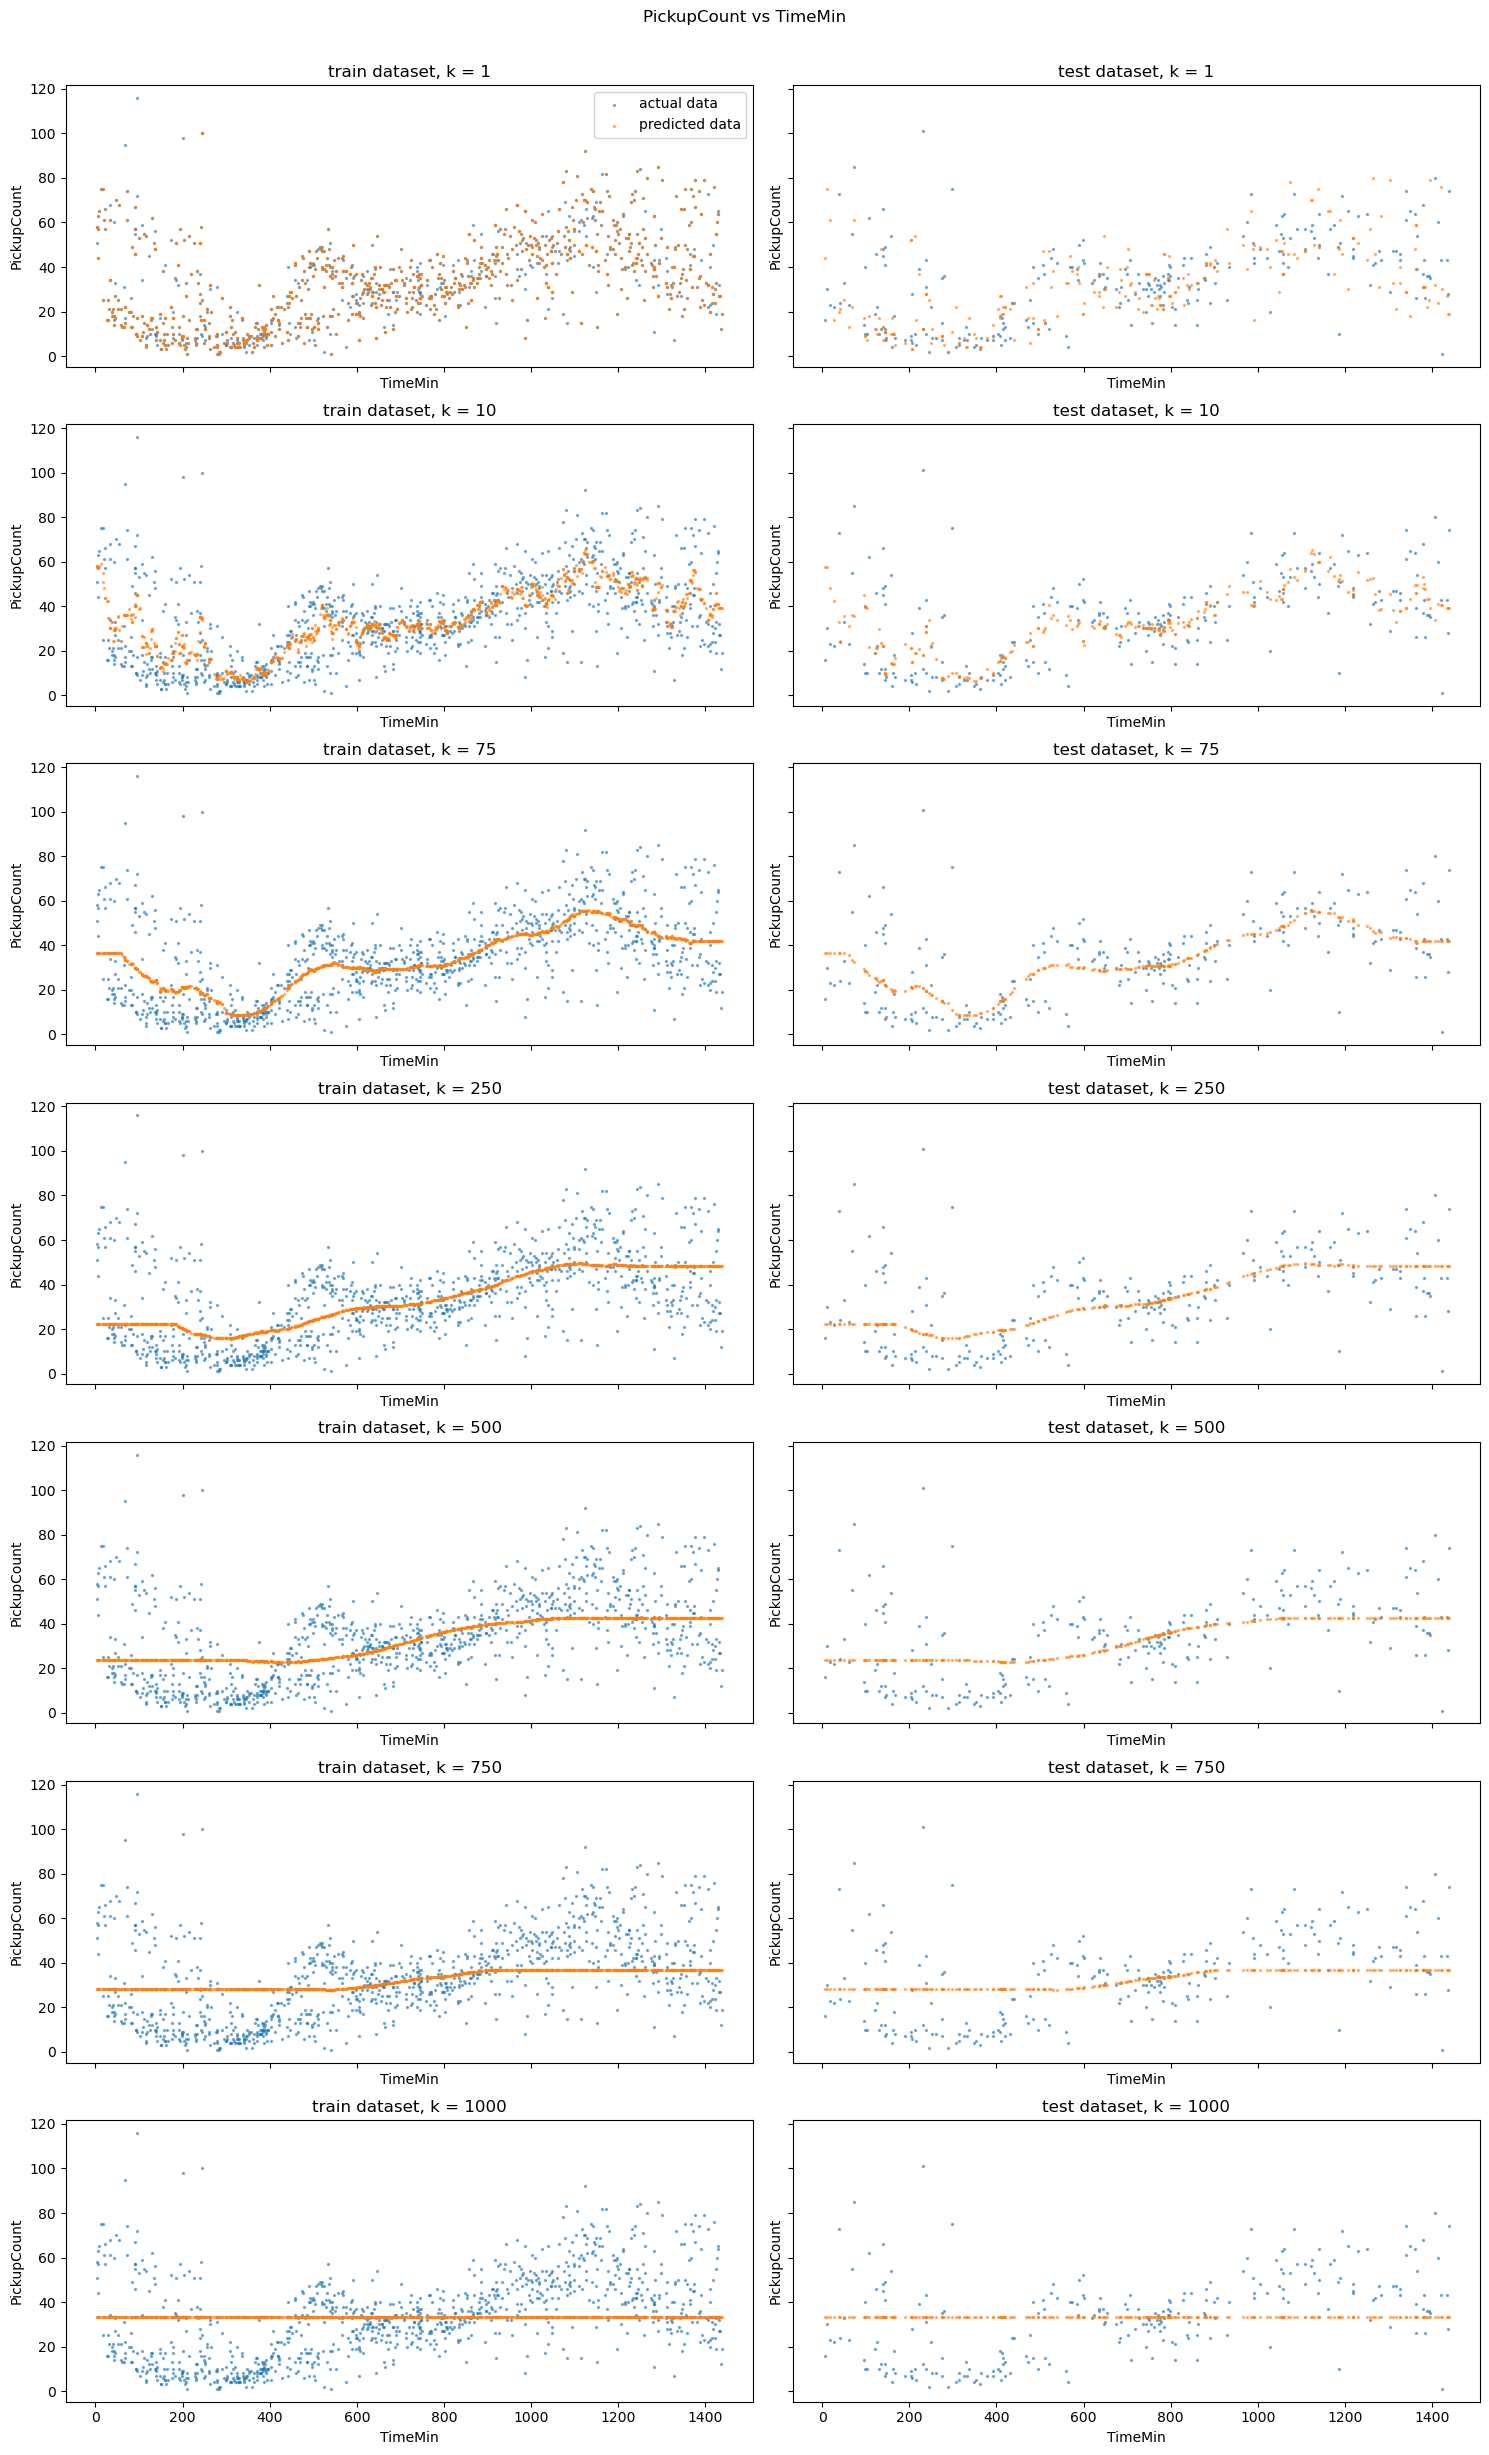

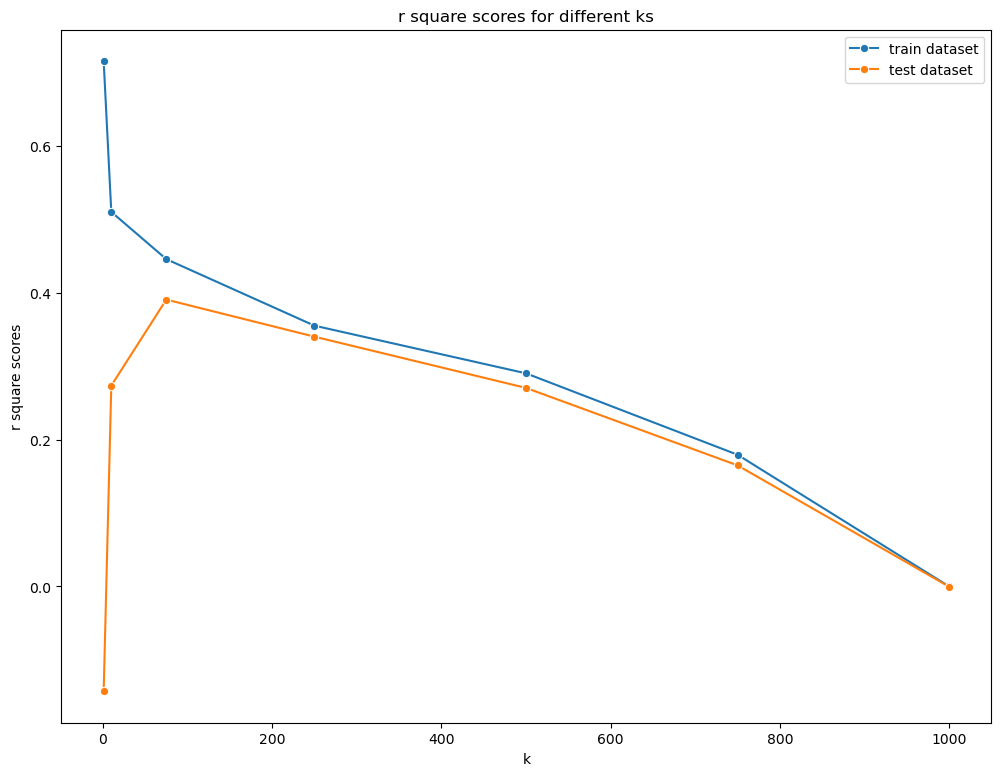

In [48]:
train_x = train_data.TimeMin.values.reshape((-1,1))
# Series.reshape is wrong, Series has no method reshape
train_y = train_data.PickupCount
test_x = test_data.TimeMin.values.reshape((-1,1))
test_y = test_data.PickupCount

ks = [1,10,75,250,500,750,1000]
KNNModels = {}

for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_x, train_y)
    KNNModels[k] = model

datasets = [[train_x, train_y],
            [test_x, test_y]]
datasets2 = ["train", "test"]    
fig, axes = plt.subplots(7,2,figsize =(15,25), sharex = True, sharey = True)
i =0
for key, model in KNNModels.items():
    # for key, model in KNNModels is wrong, use dict.items()
    for j in range(2):
        predict = model.predict(datasets[j][0])
        axes[i][j].scatter(datasets[j][0], datasets[j][1],label = "actual data", alpha = 0.5, s = 2)
        axes[i][j].scatter(datasets[j][0], predict, label = "predicted data", alpha = 0.5, s = 2)
        axes[i][j].set_title(f"{datasets2[j]} dataset, k = {key}")
        axes[i][j].set_xlabel("TimeMin")
        axes[i][j].set_ylabel("PickupCount")
    i+=1
axes[0][0].legend(loc = "upper right")
fig.tight_layout()
fig.suptitle("PickupCount vs TimeMin")
fig.subplots_adjust(top = 0.95)

In [55]:
train_rs = []
test_rs = []
for key, model in KNNModels.items():
    train_predict = model.predict(train_x)
    test_predict = model.predict(test_x)
    train_r = r2_score(train_y, train_predict)
    test_r = r2_score(test_y, test_predict)
    train_rs.append(train_r)
    test_rs.append(test_r)
    print("when k = {0}, r square score for train dataset is {1} for test dataset is {2}".format(key, train_r, test_r))

from prettytable import PrettyTable

table = PrettyTable(["k", "train r2", "test r2"])

for i in range(len(train_rs)):
    table.add_row([ks[i],train_rs[i], test_rs[i]])
print(table)

df = pd.DataFrame(np.transpose([ks, train_rs, test_rs]), columns=["k", "train_r", "test_r"])
df

/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


when k = 1, r square score for train dataset is 0.7154229692823518 for test dataset is -0.14268188571705842
when k = 10, r square score for train dataset is 0.510202224161537 for test dataset is 0.27355693253080027
when k = 75, r square score for train dataset is 0.4458425247764254 for test dataset is 0.3907526717480967
when k = 250, r square score for train dataset is 0.35524285672098443 for test dataset is 0.34026267828103685
when k = 500, r square score for train dataset is 0.29031791813302177 for test dataset is 0.27046651624354623


/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe7ff2a6c00>
Traceback (most recent call last):
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^

when k = 750, r square score for train dataset is 0.1794235918792424 for test dataset is 0.16494544482618267
when k = 1000, r square score for train dataset is 0.0 for test dataset is -0.0003843303764170525
+------+---------------------+------------------------+
|  k   |       train r2      |        test r2         |
+------+---------------------+------------------------+
|  1   |  0.7154229692823518 |  -0.14268188571705842  |
|  10  |  0.510202224161537  |  0.27355693253080027   |
|  75  |  0.4458425247764254 |   0.3907526717480967   |
| 250  | 0.35524285672098443 |  0.34026267828103685   |
| 500  | 0.29031791813302177 |  0.27046651624354623   |
| 750  |  0.1794235918792424 |  0.16494544482618267   |
| 1000 |         0.0         | -0.0003843303764170525 |
+------+---------------------+------------------------+


,k,train_r,test_r
0,1.0,0.715423,-0.142682
1,10.0,0.510202,0.273557
2,75.0,0.445843,0.390753
3,250.0,0.355243,0.340263
4,500.0,0.290318,0.270467
5,750.0,0.179424,0.164945
6,1000.0,0.000000,-0.000384


In [ ]:
plt.figure(figsize=(12,9))
sns.lineplot(x = ks, y = train_rs, label = "train dataset", marker ="o", linestyle = "-")
# sns.lineplot has no marker as "-o", only plt has it
sns.lineplot(x =ks, y = test_rs, label = "test dataset", marker = "o", linestyle = "-")
plt.xlabel("k")
plt.ylabel("r square scores")
plt.title("r square scores for different ks")
plt.legend()

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary ... **

In [49]:
# your code here
KNNModels = {}
K = [1,10,75,250,500,750,1000]

for k in K:
    KNNModels[k] = KNeighborsRegressor(n_neighbors=k)
    KNNModels[k].fit(train_data[['TimeMin']], train_data[['PickupCount']])

**2.2 For each $k$ on the training set, overlay a scatter plot ... **

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe7ff510540>
Traceback (most recent call last):
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/ting/ENTER/envs/cs109a/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'None

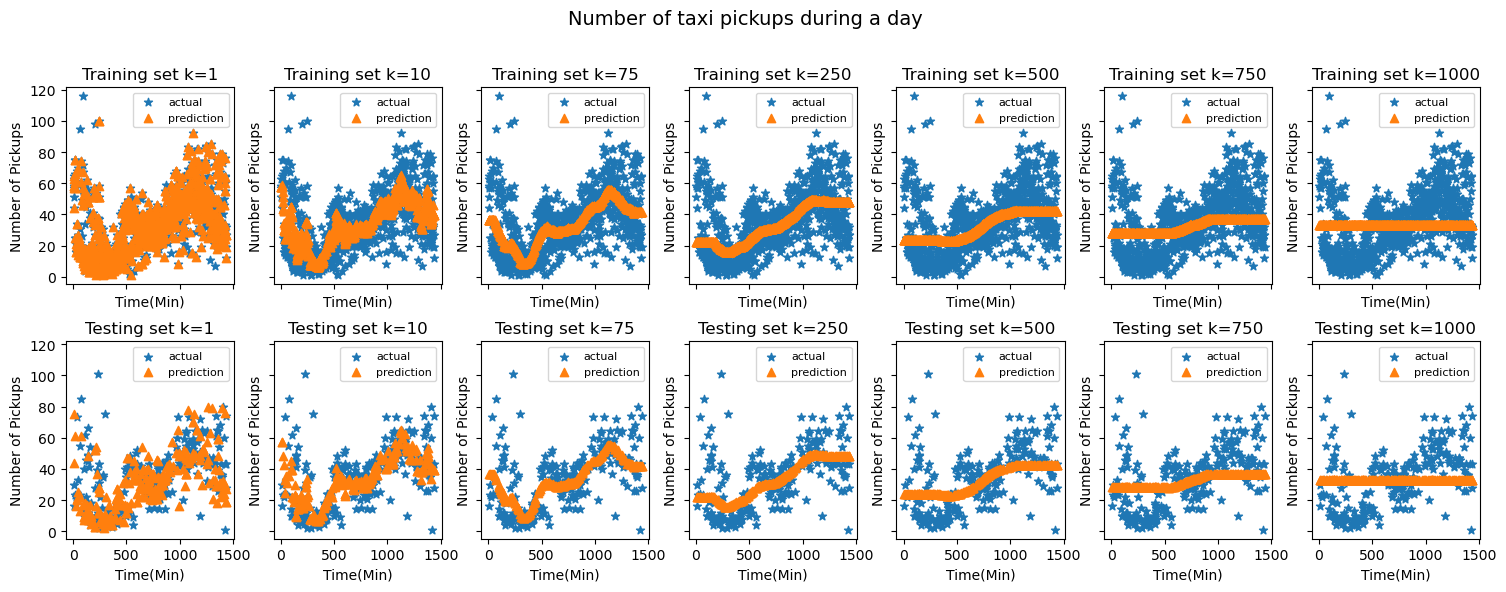

In [50]:
f, axarr = plt.subplots(2, 7, figsize=(15, 6), sharex=True, sharey=True)
# sharex sharey !!!!!!!!!!!!!!

for i, k in enumerate(K):     
    predicted_train = KNNModels[k].predict(train_data[['TimeMin']])
    axarr[0, i].scatter(train_data['TimeMin'], train_data['PickupCount'],marker='*',label='actual')
    axarr[0, i].scatter(train_data['TimeMin'], predicted_train,marker='^',label='prediction')
    axarr[0, i].set_title('Training set k=%i'%k)
    # !!!!!!!!!!!!
    axarr[0, i].set_xlabel('Time(Min)')
    axarr[0, i].set_ylabel('Number of Pickups')
    axarr[0, i].legend(prop={'size': 8})
    
    predicted_test = KNNModels[k].predict(test_data[['TimeMin']])
    axarr[1, i].scatter(test_data['TimeMin'], test_data['PickupCount'],marker='*',label='actual')
    axarr[1, i].scatter(test_data['TimeMin'], predicted_test,marker='^',label='prediction')
    axarr[1, i].set_title('Testing set k=%i'%k)
    axarr[1, i].set_ylabel('Number of Pickups')
    axarr[1, i].set_xlabel('Time(Min)')
    axarr[1, i].legend(prop={'size': 8})

f.suptitle('Number of taxi pickups during a day',fontsize=14)
# !!!!!!!!!!!!!!!!
f.tight_layout()
# automatically adjusts the positions of subplots and other elements within a figure to minimize overlapping and maximize the utilization of the available space.
f.subplots_adjust(top=0.85)
# !!!!!!!!!!!!!!

**2.3 Report the $R^2$ score for the fitted models ... **

In [231]:
# your code here
r2_train = []
r2_test = []
K = [1,10,75,250,500,750,1000]

for k in K:
    r2_train.append(KNNModels[k].score(train_data[['TimeMin']],train_data[['PickupCount']]))
    r2_test.append(KNNModels[k].score(test_data[['TimeMin']],test_data[['PickupCount']]))
    
r2 = pd.DataFrame(np.transpose([K,r2_train,r2_test]), columns=['K', 'R2_Train', 'R2_Test'])
r2

,K,R2_Train,R2_Test
0,1.0,0.712336,-0.418932
1,10.0,0.509825,0.272068
2,75.0,0.445392,0.390310
3,250.0,0.355314,0.340341
4,500.0,0.290327,0.270321
5,750.0,0.179434,0.164909
6,1000.0,0.000000,-0.000384


**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$**

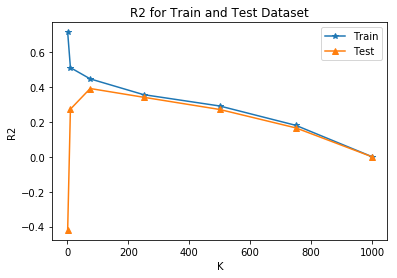

In [232]:
# your code here
plt.plot(r2['K'], r2['R2_Train'], '*-', label='Train')
plt.plot(r2['K'], r2['R2_Test'], '^-', label='Test')
plt.legend()
plt.title('R2 for Train and Test Dataset')
plt.xlabel('K')
plt.ylabel('R2')
plt.show()

**2.5 Discuss the results**

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
   
    A k-NN regression model that used $k = n$ is the equivalent of using the mean of the response variable values for all the points of the dataset as a prediction model.


2. What does an $R^2$ score of $0$ mean?

    An $R^2$ value of 0 indicates a model making predictions equivalent to a model using a constant prediction of the data's mean (and as such explains none of the variation around the mean). In k-NN Regression, an example would be the model with $k = n$ or in this case $k = 1000$
  
  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?

    None of the calculated $R^2$ values in this case on the training set are negative.  We see negative $R^2$ values for $k = 1$ and $k = 1000$ on the test set (although the test set $R^2$ value for $k = 1000$ is very close to 0).  A negative $R^2$ value indicate a model making predictions less accurate than using a constant prediction (for any configuration of features) of the mean of all response variable values.  Our observations of a highly negative $R^2$ score for $k = 1$ on the test set means that predictive value of the 1-NN model is very poor and 1-NN would be a worse model for our data than just taking the average value.  For $k = 1000$ the difference between the observed $R^2$ score on the test set and 0 is due to stochasticity and 1000-NN has a predictive power essentially equivalent to taking the average value on the training set as a prediction (in this particular case it so happens that 1000-NN is exactly the same model as using the average value of the training set for a prediction). 
    
    
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.

    The training and test plots of $R^2$ exhibit different trends, as for small $k$, the model overfits the data, so it achieves a very good $R^2$ on the training set and a very poor $R^2$ on the test data. At large $k$ values the model underfits. Although it performs equally well on the train and test data, it's not doing as well on either one as it did at a different value of $k$.
  
  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?

    The lower the value of $k$, the more variance in the predictions. The higher the value of $k$, the smoother the prediction. On the test set, greater $k$ decreases overfitting, but too large of $k$ does not allow for enough variation for an accurate prediction, so the test $R^2$ increases to a point and then decreases. Because the training $R^2$ benefits from the overfitting, the training $R^2$ only decreases as $k$ increases.  From an inspection of the plot, an ideal value of $k$ looks to be around 75.
  
  
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

    Based on test set $R^2$ scores, the best value of $k$ is 75 with a training set $R^2$ score of 0.445 and a test set score of 0.390. Note that *best* refers to performance on the test set, the set on which the model can be evaluated.

<div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect $99\%$ confidence intervals for the slope and intercept to be tighter or wider than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.
6. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the linearity assumption?


In [5]:
# statsmodels.api.OLS is a convenience function that allows you to create an instance of the statsmodels.regression.linear_model.OLS class.

train_x = sm.add_constant(train_data.TimeMin)
train_y = train_data.PickupCount
OLSModel = sm.OLS(train_y, train_x).fit()
OLSModel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Mon, 22 May 2023   Prob (F-statistic):           2.34e-62
Time:                        12:07:59   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
TimeMin        0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

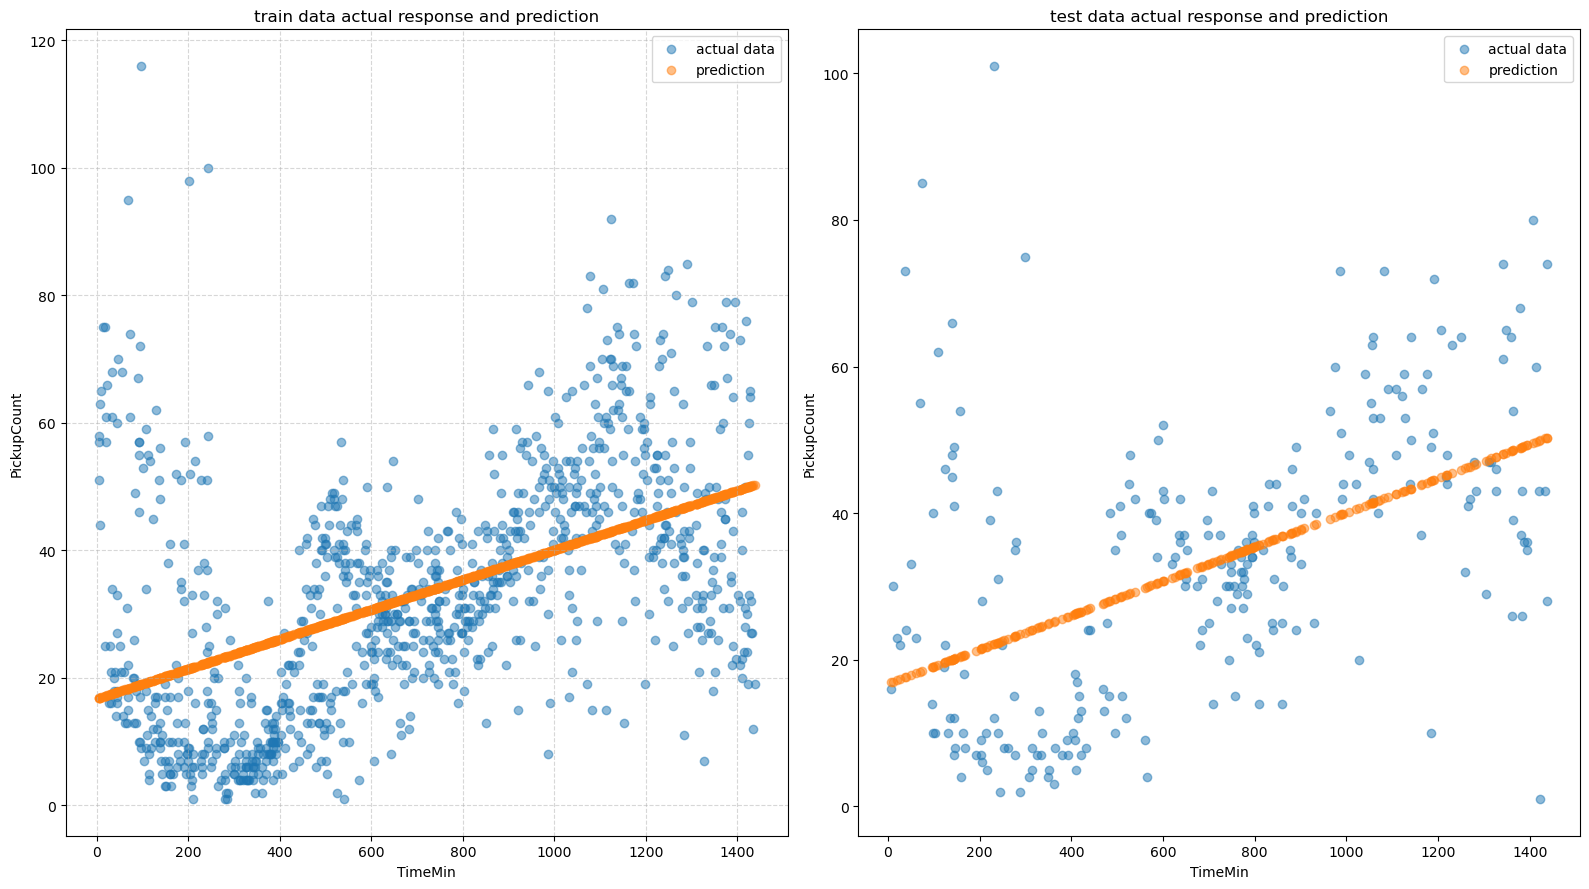

In [28]:
train_predict = OLSModel.predict(train_x)
test_x = sm.add_constant(test_data.TimeMin)
test_predict= OLSModel.predict(test_x)
fig, axes = plt.subplots(1,2, figsize = (16,9))
axes[0].grid(True, ls = "--", alpha = 0.5)
axes[0].scatter(train_data.TimeMin, train_data.PickupCount, label = "actual data", alpha =0.5)
axes[0].scatter(train_data.TimeMin, train_predict, label = "prediction", alpha =0.5)
axes[0].set_xlabel("TimeMin")
axes[0].set_ylabel("PickupCount")
axes[0].set_title("train data actual response and prediction")
axes[0].legend()

axes[1].scatter(test_data.TimeMin, test_data.PickupCount, label = "actual data", alpha =0.5)
axes[1].scatter(test_data.TimeMin, test_predict, label = "prediction", alpha =0.5)
axes[1].set_xlabel("TimeMin")
axes[1].set_ylabel("PickupCount")
axes[1].set_title("test data actual response and prediction")
axes[1].legend()

fig.tight_layout()

In [14]:
train_r2 = r2_score(train_y, train_predict)
test_r2 = r2_score(test_data.PickupCount, test_predict)

print(f"the r squared score for train data is {train_r2: .4f} for test data is {test_r2: .4f}")

the r squared score for train data is  0.2430 for test data is  0.2407


In [9]:
print(f"the slope is {OLSModel.params[1]: .4f}, the intercept is {OLSModel.params[0]: .4f}.")

the slope is  0.0233, the intercept is  16.7506.


In [31]:
ci = OLSModel.conf_int(alpha = 0.05)
ci.rename(columns = {0: "2.5%", 1:"97.5%"})

,2.5%,97.5%
const,14.675141,18.826062
TimeMin,0.020777,0.025893


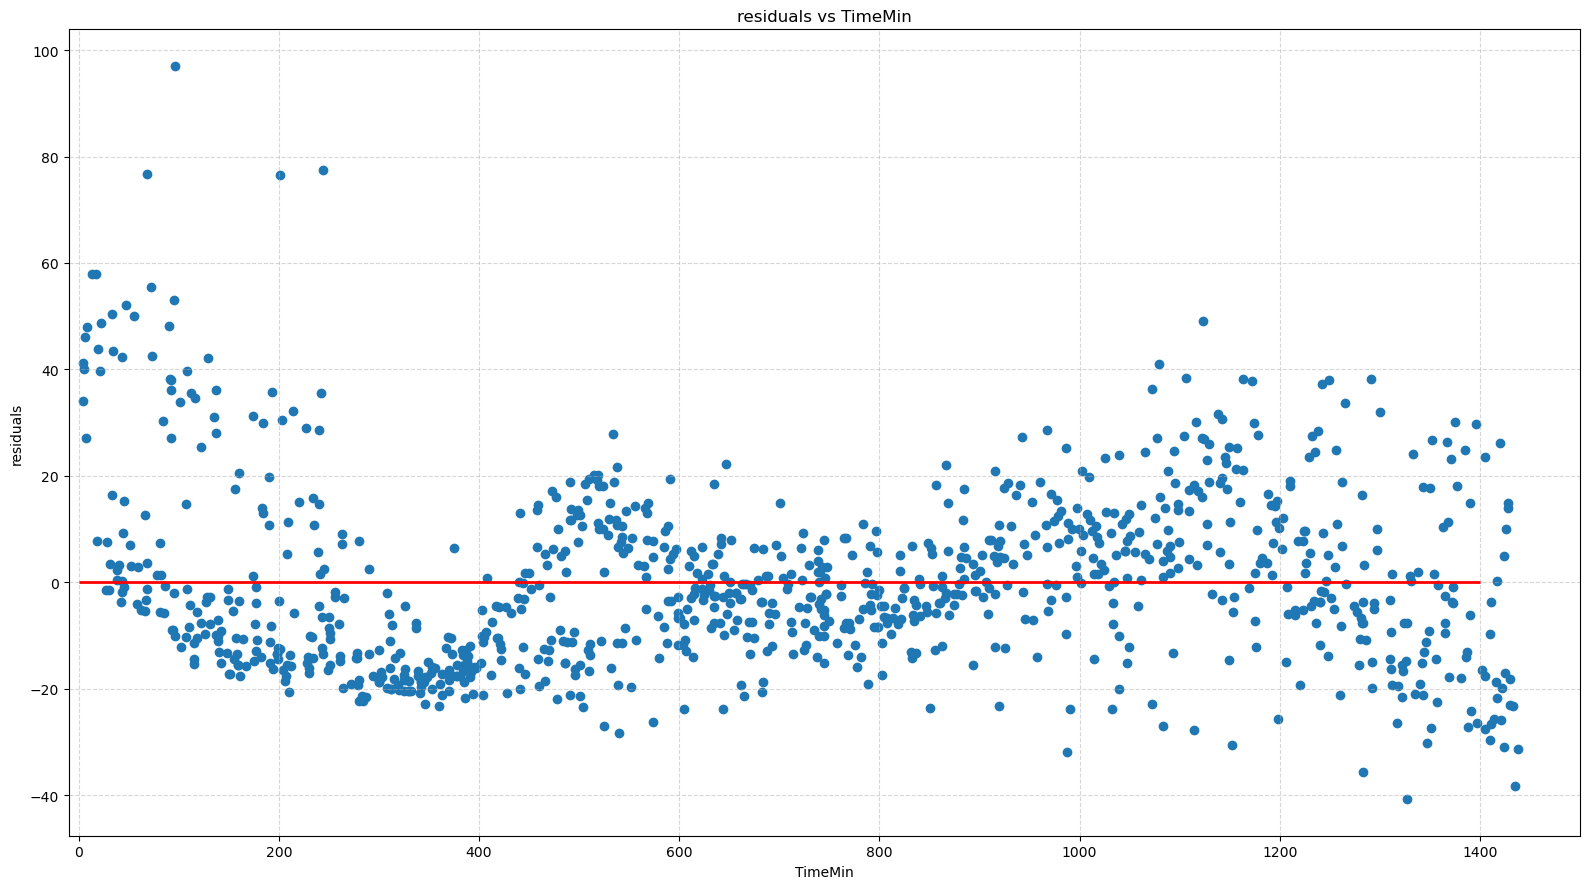

In [29]:
plt.figure(figsize =(16,9))
plt.grid(True, ls ="--", alpha = 0.5)
e = train_y - train_predict
plt.scatter(train_data.TimeMin, e)
plt.hlines(0, 0, 1400, colors="r", lw = 2)
plt.xlim(-10,1500)
plt.xlabel("TimeMin")
plt.ylabel("residuals")
plt.title("residuals vs TimeMin")
plt.tight_layout()

### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance ... **

In [235]:
# your code here
x_train, y_train = train_data['TimeMin'], train_data['PickupCount']
x_test, y_test = test_data['TimeMin'], test_data['PickupCount']

# create the X matrix by appending a column of ones to x_train
X_train = sm.add_constant(x_train)

# build the OLS model from the training data
OLSModel = sm.OLS(y_train, X_train)

# fit and save regression info 
texi_ols = OLSModel.fit()

print(texi_ols.summary())
!!!!!!!!!!!!

                            OLS Regression Results                            
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.34e-62
Time:                        20:50:26   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.0

**3.2 Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set ... **

Text(0.5,0.98,'Numer of taxi pickups during a day')

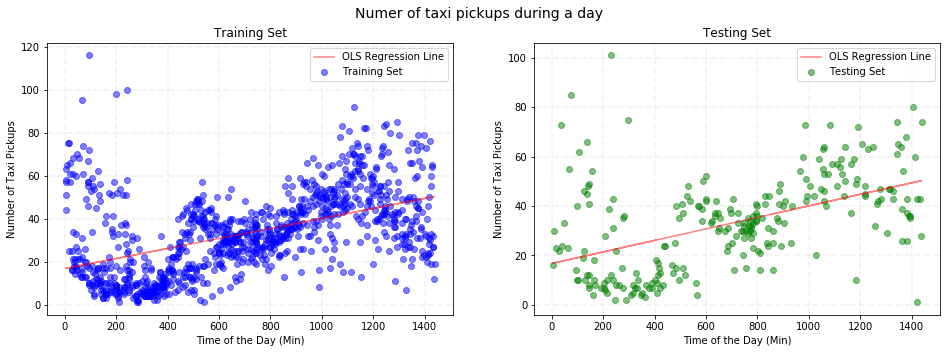

In [236]:
# your code here
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].grid(True, lw=1.75, ls='--', alpha=0.15)
ax[0].scatter(x_train, y_train, c='b', alpha=0.5, label='Training Set')
ax[0].plot(x_train, texi_ols.fittedvalues, c='r', alpha=0.5, label='OLS Regression Line')
ax[0].set_title(r'Training Set')
ax[0].set_xlabel(r'Time of the Day (Min)')
ax[0].set_ylabel(r'Number of Taxi Pickups')
ax[0].legend(loc='upper right')

ax[1].grid(True, lw=1.75, ls='--', alpha=0.15)
ax[1].scatter(x_test, y_test, c='g', alpha=0.5, label='Testing Set')
ax[1].plot(x_train, texi_ols.fittedvalues, c='r', alpha=0.5, label='OLS Regression Line')
ax[1].set_title(r'Testing Set')
ax[1].set_xlabel(r'Time of the Day (Min)')
ax[1].set_ylabel(r'Number of Taxi Pickups')
ax[1].legend(loc='upper right')

fig.suptitle('Numer of taxi pickups during a day', fontsize=14)

**3.3 Report the $R^2$ score for the fitted model on both the training and test sets. **

In [240]:
# your code here
X_test = sm.add_constant(x_test)
print("R-squared for training set: %f" % texi_ols.rsquared)
# !!!!!!!!!!!!!
print("R-squared for testing set: %f" % r2_score(y_test, texi_ols.predict(X_test)))

R-squared for training set: 0.243026
R-squared for testing set: 0.240662


**3.4 Report the slope and intercept values for the fitted linear model.  **

In [241]:
# your code here
beta0 = texi_ols.params[0]
beta1 = texi_ols.params[1]
print("Intercept of the OLS: %f" % beta0)
print("Slope of the OLS: %f" % beta1)

Intercept of the OLS: 16.750601
Slope of the OLS: 0.023335


**3.5 Report the $95\%$ confidence interval for the slope and intercept.**

In [242]:
# your code here
thresh = 0.05
intervals = texi_ols.conf_int(alpha=thresh)
# !!!!!!!!!!
intervals = intervals.rename(index=str, columns={0:str(thresh/2*100)+"%",1:str((1-thresh/2)*100)+"%"})
intervals

,2.5%,97.5%
const,14.675141,18.826062
TimeMin,0.020777,0.025893


**3.6 Create a scatter plot of the residuals**

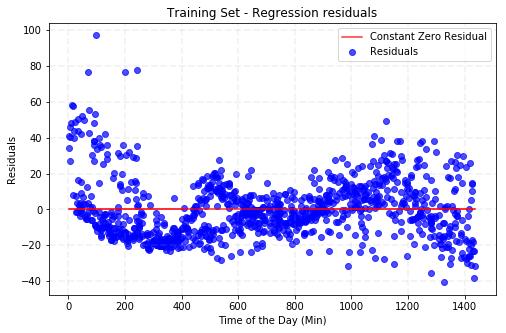

In [260]:
# your code here
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.grid(True, lw=1.75, ls='--', alpha=0.15)
ax.scatter(x_train, texi_ols.resid, c='b', alpha=0.7, label='Residuals')
ax.plot(x_train, [0] * len(x_train), c='r', alpha=0.8, label='Constant Zero Residual')
# !!!!!!!!!!!!!
ax.set_title(r'Training Set - Regression residuals')
ax.set_xlabel(r'Time of the Day (Min)')
ax.set_ylabel(r'Residuals')
ax.legend(loc='upper right')
plt.show()

**3.7 Discuss the results:**

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
  
  The test $R^2$ is lower for Linear Regression than for k-NN regression for all but the most suboptimal values of $k$ ($k \approx 0$ or $k \approx n$).  This isn't surprising since there are various indicators that a linear regression model isn't an ideal model for this particular choice of data and feature space.
  
  
2. What does the sign of the slope of the fitted linear model convey about the data?
  
  The positive slope implies that the number of pickups increases throughout the day. The slops is positive for all values within the confidence interval.
  
  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?
  
  The estimates for slope and intercept are reasonably precise. The intercept is estimated to fall between around 14 to 18 on data that ranges from 0-100, which reasonably small though certainly far from perfect. The slope, it seems, is very precise, estimated to be between .020 and .025. In practical terms, using the lower end would predict 29 pickups (plus the intercept) at 11:59pm and using the upper bounds would predict 36 pickups (plus the intercept) at 11:59 pm, which is a fairly tight range. Our uncertainty in the value of the slope is small enough to only moderately impact our overall uncertainty, even at the extremes of the data.
  
  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter (shorter) or looser (longer) than the $95\%$ confidence intervals? Briefly explain your answer.
  
  We'd expect a 99% confidence interval to be looser, as it should allow for an at least even wider possibility of values that are believable, or consistent with the data. With increased confidence level, even more values become plausible so the interval is lengthened on both sides. <br>
  
  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.
  
  The assumption of linearity does not seem to be perfectly justified, as the residuals are not scattered randomly around 0 and there is a clear structure! <br>
<br>


6. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the linearity assumption?

    Looking at x=0 and x=1440, y values should be same because it’s only a  minute difference in time. That’s not the case for y though. This invalidates the linearity assumption. This can be checked with the residual plots.

  

<div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or one correct definition of an outlier).**


<div class="exercise"><b> Question 4 [25 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the 3 outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.


**4.5** Create a figure with two subplots: the first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?



**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Alter the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order of 'severity').  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step?
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
    
**4.8**. Run your algorithm in 4.7 on the training set data.  
1. What outliers does it identify?
2. How do those outliers compare to the outliers you found in 4.4?
3. How does the general outlier-free Linear Regression model you created in 4.7 perform compared to the simple one in 4.4?

In [51]:
train_data = pd.read_csv("data/outliers_train.csv")
test_data = pd.read_csv("data/outliers_test.csv")

train_x, train_y = train_data.X, train_data.Y
test_x, test_y = test_data.X, test_data.Y

def regression_model(data_x, data_y):
    X = sm.add_constant(data_x)
    OutlierOLSModel = OLS(data_y, X).fit()
    print(OutlierOLSModel.summary())
    return OutlierOLSModel

OutlierOLSModel = regression_model(train_x, train_y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Tue, 23 May 2023   Prob (F-statistic):             0.0351
Time:                        14:09:21   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.6

Text(0, 0.5, 'Y')

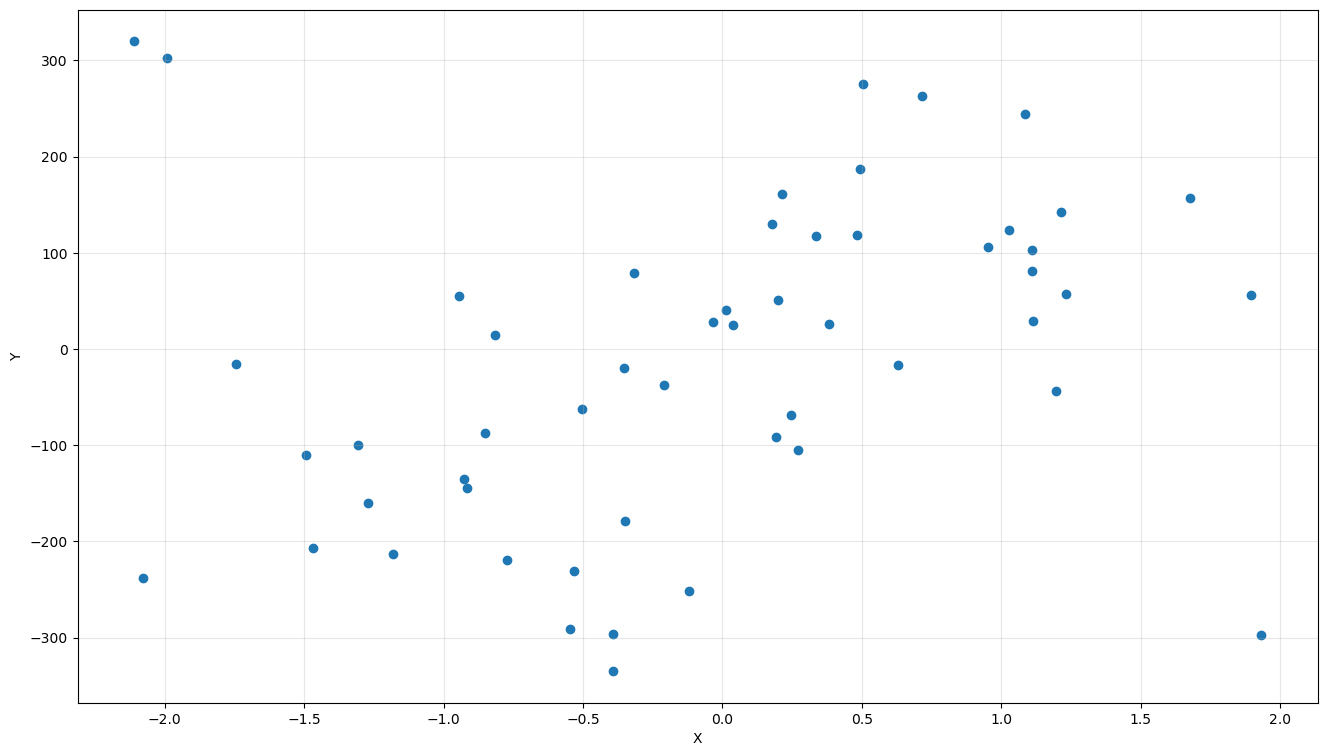

In [6]:
plt.figure(figsize = (16,9))
plt.grid(True, alpha=0.3)
plt.scatter(train_x, train_y)
plt.xlabel("X")
plt.ylabel("Y")

In [7]:
np.prod(53*52*51)/np.prod(3*2*1)

23426.0

In [52]:
def find_outliers_simple(dataset_x, dataset_y):
    model = regression_model(dataset_x, dataset_y)
    X = sm.add_constant(dataset_x)
    prediction = model.predict(X)
    residual = np.abs(prediction - dataset_y)
    index = np.argsort(residual)
    outlier_indices = index[-3:]
    return outlier_indices

outlier_indices = find_outliers_simple(train_x, train_y)
outlierfree_x = train_x.drop(outlier_indices, axis = 0)
outlierfree_y = train_y.drop(outlier_indices, axis = 0)

OutlierFreeSimpleModel = regression_model(outlierfree_x, outlierfree_y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Tue, 23 May 2023   Prob (F-statistic):             0.0351
Time:                        14:09:27   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.6

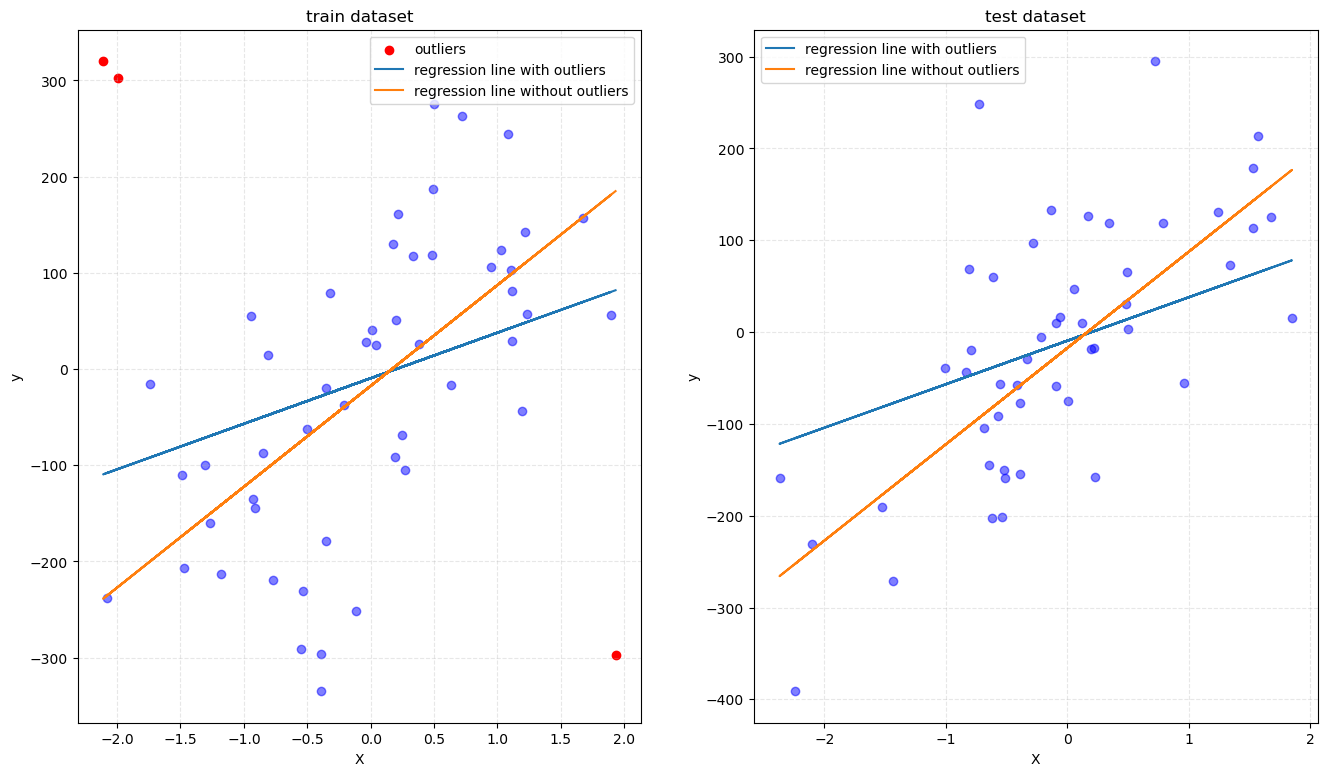

In [30]:
train_X = sm.add_constant(train_x)
test_X = sm.add_constant(test_x)
prediction_train1 = OutlierOLSModel.predict(train_X)
prediction_train2 = OutlierFreeSimpleModel.predict(train_X)
prediction_test1 = OutlierOLSModel.predict(test_X)
prediction_test2 = OutlierFreeSimpleModel.predict(test_X)

fig, axes = plt.subplots(1,2, figsize = (16,9))
axes[0].grid(True, ls = "--", alpha = 0.3)
axes[0].scatter(outlierfree_x, outlierfree_y, alpha = 0.5, color = "b")
axes[0].scatter(train_x[outlier_indices], train_y[outlier_indices], color = "r", label = "outliers")
axes[0].plot(train_x, prediction_train1, label = "regression line with outliers")
axes[0].plot(train_x, prediction_train2, label = "regression line without outliers")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("train dataset")
axes[0].legend()

axes[1].grid(True, ls = "--", alpha = 0.3)
axes[1].scatter(test_x, test_y, alpha = 0.5, color = "b")
axes[1].plot(test_x, prediction_test1, label = "regression line with outliers")
axes[1].plot(test_x, prediction_test2, label = "regression line without outliers")
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].set_title("test dataset")
axes[1].legend()

In [33]:
r2_outlier = r2_score(test_y, prediction_test1)
r2_outlierfree = r2_score(test_y, prediction_test2)

print(f"the r sqaured score with outliers is {r2_outlier: .4f}")
print(f"the r sqaured score without outliers is {r2_outlierfree: .4f}")

the r sqaured score with outliers is  0.3409
the r sqaured score without outliers is  0.4530


In [57]:
def find_outliers_general(dataset_x, dataset_y):
    mean_x = np.mean(dataset_x)
    mean_y = np.mean(dataset_y)
    d_x = np.abs(dataset_x-mean_x)/np.std(dataset_x)
    d_y = np.abs(dataset_y -mean_y)/np.std(dataset_y)
    outliers = d_x + d_y >3.0
    outlier_indices = dataset_x[outliers].index
    return outlier_indices

outliers = find_outliers_general(train_x, train_y)
outlierfree_x2 = train_x.drop(outliers, axis =0)
outlierfree_y2 = train_y.drop(outliers, axis =0)

OutlierFreeGeneralModel = regression_model(outlierfree_x2, outlierfree_y2)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     28.50
Date:                Tue, 23 May 2023   Prob (F-statistic):           2.65e-06
Time:                        14:14:54   Log-Likelihood:                -303.52
No. Observations:                  49   AIC:                             611.0
Df Residuals:                      47   BIC:                             614.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4255     17.298     -1.007      0.3

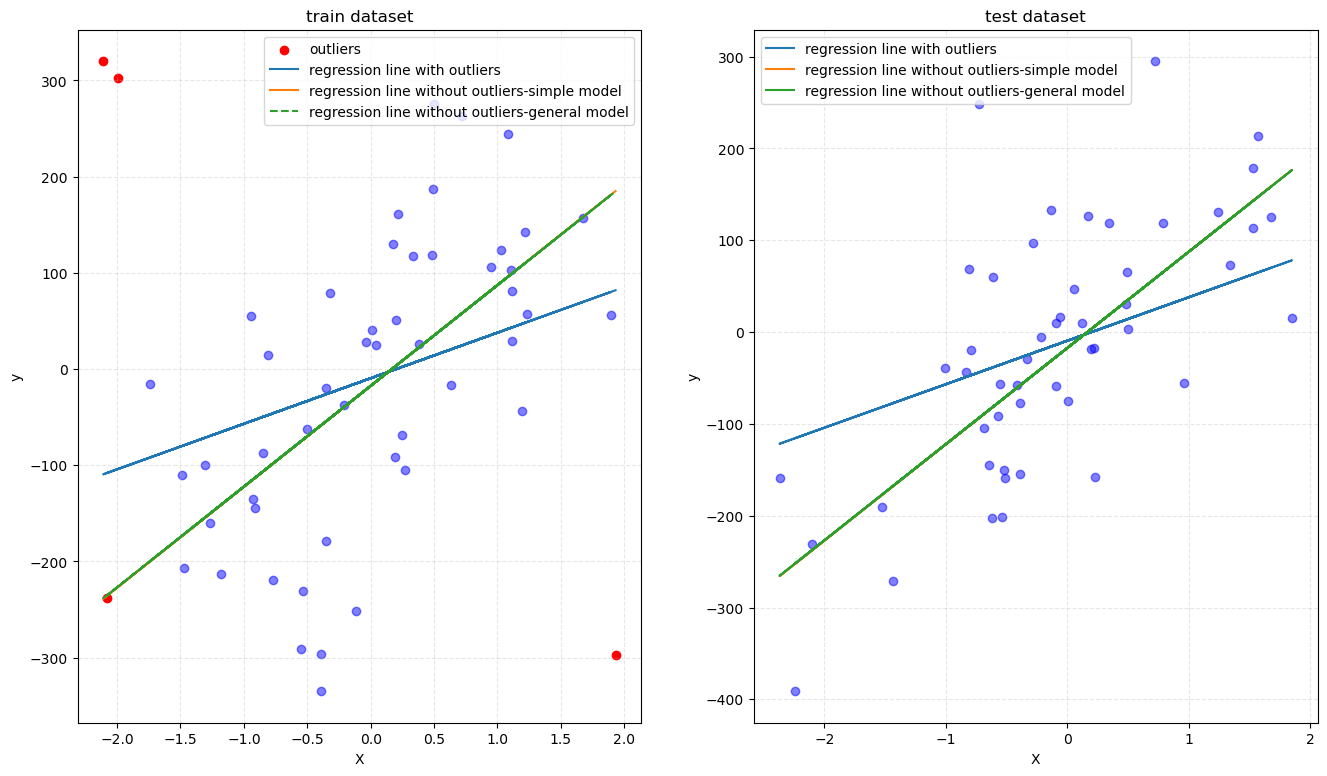

In [67]:
train_X = sm.add_constant(train_x)
test_X = sm.add_constant(test_x)
prediction_train1 = OutlierOLSModel.predict(train_X)
prediction_train2 = OutlierFreeSimpleModel.predict(train_X)
prediction_test1 = OutlierOLSModel.predict(test_X)
prediction_test2 = OutlierFreeSimpleModel.predict(test_X)
prediction_train3 = OutlierFreeGeneralModel.predict(train_X)
prediction_test3 = OutlierFreeGeneralModel.predict(test_X)

fig, axes = plt.subplots(1,2, figsize = (16,9))
axes[0].grid(True, ls = "--", alpha = 0.3)
axes[0].scatter(outlierfree_x2, outlierfree_y2, alpha = 0.5, color = "b")
axes[0].scatter(train_x[outliers], train_y[outliers], color = "r", label = "outliers")
axes[0].plot(train_x, prediction_train1, label = "regression line with outliers")
axes[0].plot(train_x, prediction_train2, label = "regression line without outliers-simple model")
axes[0].plot(train_x, prediction_train3, label = "regression line without outliers-general model", ls = "--")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("train dataset")
axes[0].legend()

axes[1].grid(True, ls = "--", alpha = 0.3)
axes[1].scatter(test_x, test_y, alpha = 0.5, color = "b")
axes[1].plot(test_x, prediction_test1, label = "regression line with outliers")
axes[1].plot(test_x, prediction_test2, label = "regression line without outliers-simple model")
axes[1].plot(test_x, prediction_test3, label = "regression line without outliers-general model")
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].set_title("test dataset")
axes[1].legend()

In [68]:
r2_outlierfreegeneral = r2_score(test_y, prediction_test3)
r2_outlierfree = r2_score(test_y, prediction_test2)

print(f"the r sqaured score without outliers-general model is {r2_outlierfreegeneral: .4f}")
print(f"the r sqaured score without outliers-simple model  is {r2_outlierfree: .4f}")

the r sqaured score without outliers-general model is  0.4531
the r sqaured score without outliers-simple model  is  0.4530


### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data? ** 

In [72]:
outliers_train = pd.read_csv("data/outliers_train.csv")
outliers_test = pd.read_csv("data/outliers_test.csv")

In [74]:
def scatterplot(x, y, title):
    fig, ax = plt.subplots(1, 1)
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)
    ax.scatter(x_train, y_train)
    ax.set_title(title)
    ax.set_xlabel(r'$X$')
    # !!!!!!!!!!!!
    ax.set_ylabel(r'$Y$')
    
    return ax

<Axes: title={'center': 'Scatter Plot of Y vs X'}, xlabel='$X$', ylabel='$Y$'>

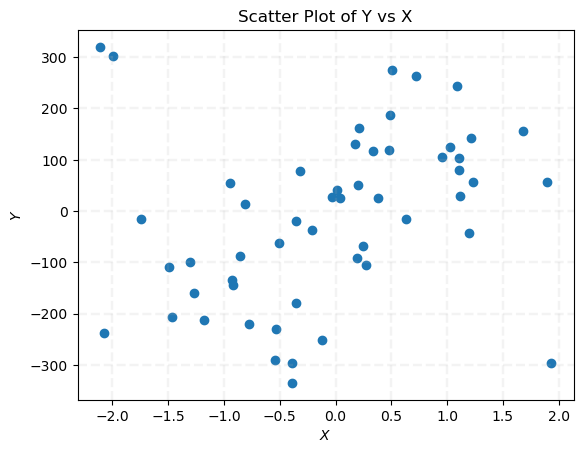

In [75]:
x_train, y_train = outliers_train['X'], outliers_train['Y']
x_test, y_test = outliers_test['X'], outliers_test['Y']
scatterplot(x_train, y_train, 'Scatter Plot of Y vs X')

Visual inspection of the training set tells me that some potential outliers are: 

- Top Left Cornor: two points around (-2.0, 300)
- Bottom Right Cornor: one point around (2.0, -300)

**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create ... **

In [76]:
# your code here
# create the X matrix by appending a column of ones to x_train
X_train = sm.add_constant(x_train)

# build the OLS model from the training data
OutlierOLSModel = sm.OLS(y_train, X_train)

# fit and save regression info 
results_sm = OutlierOLSModel.fit()

print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Tue, 23 May 2023   Prob (F-statistic):             0.0351
Time:                        14:53:58   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.6

**4.3 One potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  
  

Picking 3 out of 53 samples gives in total (53 x 52 x 51) / (3 x 2) = 23,426 combinations.

**4.4 CS109 hack ... **

In [77]:
def find_outliers_simple(dataset_x, dataset_y):
    # your code here
    # create the X matrix by appending a column of ones to x_train
    X_train = sm.add_constant(dataset_x)

    # build the OLS model from the training data
    OutlierOLSModel = sm.OLS(dataset_y, X_train)

    # fit and save regression info 
    results_sm = OutlierOLSModel.fit()
    
    # create a dataframe for labeling outliers
    df = pd.DataFrame({'X': dataset_x, 
                       'Y': dataset_y, 
                       'resid': results_sm.resid, 
                    #    !!!!!!!!!!!!
                       'resid_abs': abs(results_sm.resid)
                      })
    
    df.sort_values(by=['resid_abs'], ascending=False, inplace=True)
    
    outlier_indices = list(df.iloc[:3].index)
    
    return outlier_indices

In [78]:
# get outliers
# your code here
outlier_indices = find_outliers_simple(x_train, y_train)
print(outlier_indices)

[50, 51, 52]


In [79]:
outliers_train_clean = outliers_train.drop(outlier_indices)

In [80]:
# calculate outlier model
# your code here
x_train_clean, y_train_clean = outliers_train_clean['X'], outliers_train_clean['Y']

# create the X matrix by appending a column of ones to x_train
X_train_clean = sm.add_constant(x_train_clean)

# build the OLS model from the training data
OutlierFreeSimpleModel = sm.OLS(y_train_clean, X_train_clean)

# fit and save regression info 
results_sm_clean = OutlierFreeSimpleModel.fit()

print(results_sm_clean.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     32.50
Date:                Tue, 23 May 2023   Prob (F-statistic):           7.16e-07
Time:                        14:54:19   Log-Likelihood:                -309.21
No. Observations:                  50   AIC:                             622.4
Df Residuals:                      48   BIC:                             626.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4796     16.944     -1.032      0.3

**4.5 Create a figure with two subplots: the first is a scatterplot ... **

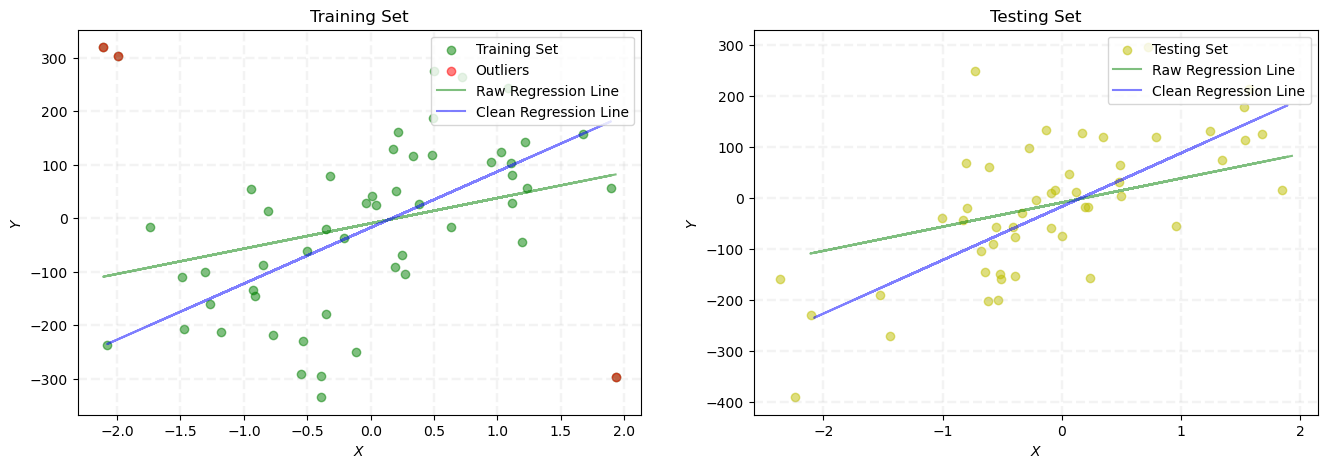

In [81]:
# plot 
# your code here
outliers_x = outliers_train.loc[outlier_indices]['X']
outliers_y = outliers_train.loc[outlier_indices]['Y']

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].grid(True, lw=1.75, ls='--', alpha=0.15)
ax[0].scatter(x_train, y_train, c='g', alpha=0.5, label='Training Set')
ax[0].scatter(outliers_x, outliers_y, c='r', alpha=0.5, label='Outliers')
ax[0].plot(x_train, results_sm.fittedvalues, c='g', alpha=0.5, label='Raw Regression Line')
# !!!!!!!!!!!
ax[0].plot(x_train_clean, results_sm_clean.fittedvalues, c='b', alpha=0.5, label='Clean Regression Line')
ax[0].set_title(r'Training Set')
ax[0].set_xlabel(r'$X$')
ax[0].set_ylabel(r'$Y$')
ax[0].legend(loc='upper right')

ax[1].grid(True, lw=1.75, ls='--', alpha=0.15)
ax[1].scatter(x_test, y_test, c='y', alpha=0.5, label='Testing Set')
ax[1].plot(x_train, results_sm.fittedvalues, c='g', alpha=0.5, label='Raw Regression Line')
# should be x_test
ax[1].plot(x_train_clean, results_sm_clean.fittedvalues, c='b', alpha=0.5, label='Clean Regression Line')
ax[1].set_title(r'Testing Set')
ax[1].set_xlabel(r'$X$')
ax[1].set_ylabel(r'$Y$')
ax[1].legend(loc='upper right')

Visually the regression line without outliers fit the test set data more closely.  

**4.6  Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**

In [82]:
# your code here
X_test = sm.add_constant(x_test)
r2_raw = r2_score(y_test, results_sm.predict(X_test))
r2_clean = r2_score(y_test, results_sm_clean.predict(X_test))

print("OutlierOLSModel R-squared: %f" % r2_raw)
print("OutlierFreeSimpleModel R-squared: %f" % r2_clean)

OutlierOLSModel R-squared: 0.340857
OutlierFreeSimpleModel R-squared: 0.452957


Conclusion: OutlierFreeSimpleModel is better than OutlierOLSModel.

**4.7 One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers. **

In [83]:
## Logic: Drop outliers until R-squared starts to decrease.  
## Could add a minimium R-squared improvement requirment. If less than the cutoff, stop the algorithm.
def find_outliers_general(dataset_x, dataset_y, n_trails):
    dataset_x_raw = dataset_x
    dataset_y_raw = dataset_y
    
    r2_score = []
    outliers = []
    
    for _ in range(n_trails):
        X_train = sm.add_constant(dataset_x)
        OutlierOLSModel = sm.OLS(dataset_y, X_train)
        results_sm = OutlierOLSModel.fit()
        
        # if r-squared starts to decrease, exit the function 
        if r2_score and results_sm.rsquared < r2_score[-1]:
            break
        # if r2_score is True
        # and if ...
        # !!!!!!!!!!!!
    
        r2_score.append(results_sm.rsquared)
        
        df = pd.DataFrame({'X': dataset_x, 
                           'Y': dataset_y, 
                           'resid': results_sm.resid, 
                           'resid_abs': abs(results_sm.resid)
                          })
        
        df.sort_values(by=['resid_abs'], ascending=False, inplace=True)
        
        outlier_indices = list(df.iloc[:1].index)
        outliers += outlier_indices
        # !!!!!!!!!!!
        df.drop(outlier_indices, inplace=True)
        dataset_x, dataset_y = df['X'], df['Y']
    
    return r2_score, outliers

**4.8 Run your algorithm in 4.7 on the training set data **

In [84]:
r2_score, outliers = find_outliers_general(x_train, y_train, x_train.shape[0])
outliers_train.loc[outliers]

,X,Y
50,-2.110000,320.000000
51,-1.991000,303.000000
52,1.931000,-297.000000
1,-0.394034,-334.859357
14,-0.391668,-295.878637
28,0.502911,275.862982
5,-0.119129,-250.992560
35,-0.546692,-291.094951
24,0.716968,263.449637
20,-0.531202,-230.593281


In [278]:
print(outliers)

[50, 51, 52, 1, 14, 28, 5, 35, 24, 20, 7]


Text(0,0.5,'R Squared')

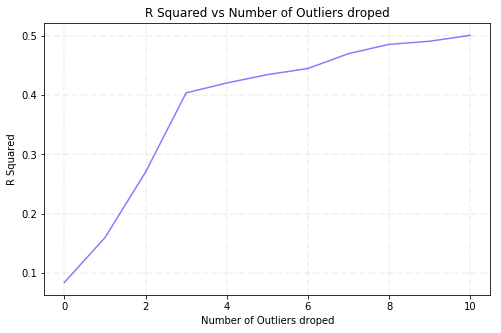

In [279]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.grid(True, lw=1.75, ls='--', alpha=0.15)
ax.plot(r2_score, c='b', alpha=0.5)
ax.set_title(r'R Squared vs Number of Outliers droped')
ax.set_xlabel(r'Number of Outliers droped')
ax.set_ylabel(r'R Squared')

In [280]:
# your code here
outliers_x_gen = outliers_train.loc[outliers]['X']
outliers_y_gen = outliers_train.loc[outliers]['Y']

outliers_train_gen = outliers_train.drop(outliers)

x_train_gen, y_train_gen = outliers_train_gen['X'], outliers_train_gen['Y']

# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train_gen)

# build the OLS model from the training data
OutlierFreeGeneralModel = sm.OLS(y_train_gen, X)

# fit and save regression info 
results_sm_gen = OutlierFreeGeneralModel.fit()

print(results_sm_gen.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     38.14
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.68e-07
Time:                        21:40:27   Log-Likelihood:                -245.20
No. Observations:                  42   AIC:                             494.4
Df Residuals:                      40   BIC:                             497.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9159     13.134     -0.450      0.6

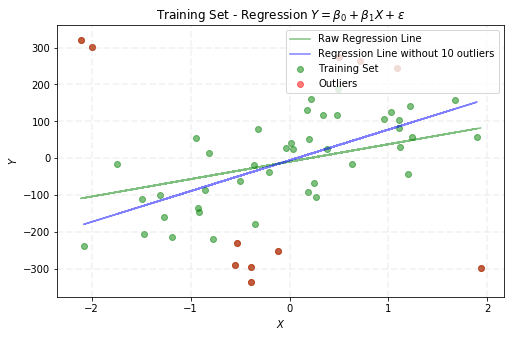

In [281]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.grid(True, lw=1.75, ls='--', alpha=0.15)
ax.scatter(x_train, y_train, c='g', alpha=0.5, label='Training Set')
ax.scatter(outliers_x_gen, outliers_y_gen, c='r', alpha=0.5, label='Outliers')
ax.plot(x_train, results_sm.fittedvalues, c='g', alpha=0.5, label='Raw Regression Line')
ax.plot(x_train_gen, results_sm_gen.fittedvalues, c='b', alpha=0.5, label='Regression Line without 10 outliers')
ax.set_title(r'Training Set - Regression $Y = \beta_0 + \beta_1 X + \epsilon$')
# !!!!!!!!!!!
ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.legend(loc='upper right')

In [284]:
# your code here
X_test = sm.add_constant(x_test)
r2_clean = r2_score(y_test, results_sm_clean.predict(X_test))
r2_gen = r2_score(y_test, results_sm_gen.predict(X_test))

print("OutlierFreeSimpleModel R-squared: %f" % r2_clean)
print("OutlierFreeGeneralModel R-squared: %f" % r2_gen)

OutlierFreeSimpleModel R-squared: 0.452957
OutlierFreeGeneralModel R-squared: 0.453556


**4.8.1 What outliers does it identify?**

Answer: The following indices are identified as outliers: [50, 51, 52, 1, 14, 28, 5, 35, 24, 20, 7]

**4.8.2 How do those outliers compare to the outliers you found in 4.4?**

Answer: There are 10 outliers detected in the general method, because droping the 11th outliers will cause the r-squared to decrease, while 4.4 assumes that there are 3 outliers in total with the above scatter plot showing the distribution. 

**4.8.3 How does the general outlier-free Linear Regression model you created in 4.7 perform compared to the simple one in 4.4?**

Answer: General model in 4.7 is slightly better than the model in 4.4, with R-squared of 0.453556 vs 0.452957.


